In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
from infomap import Infomap
from genetic_algorithm import GeneticAlgorithmCommunityDetection

In [2]:
def partition_to_communities(partition):
    """
    Group nodes by community label.

    Complexity: O(N), where N = number of nodes.
    """
    communities = {}
    for node, label in partition.items():  # O(N)
        communities.setdefault(label, set()).add(node)
    return list(communities.values())

def visualize_communities(G, partition, title="Communities"):
    """
    Visualizes the graph G with nodes colored according to their community as
    defined by partition (node -> label). Uses a spring layout and a matplotlib colormap.
    """
    # Obtain a layout for the nodes.
    pos = nx.spring_layout(G, seed=42)
    
    # Determine the communities.
    communities = partition_to_communities(partition)
    num_communities = len(communities)
    
    # Create a color map.
    cmap = matplotlib.colormaps["tab20"]
    # Map each node to a color corresponding to its community.
    node_colors = {}
    for i, community in enumerate(communities):
        for node in community:
            node_colors[node] = cmap(i % 20)
    
    # Draw nodes with assigned colors.
    node_color_list = [node_colors[node] for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_color=node_color_list, node_size=500, alpha=0.8)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    
    # Create labels for the nodes.
    labels = {node: str(node) for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_color='w')
    
    plt.title(title)
    plt.axis("off")
    plt.show()

In [3]:
# Build an undirected graph with 12 nodes divided into 3 clusters.

G_undirected = nx.Graph()
nodes = list(range(1, 13))
G_undirected.add_nodes_from(nodes)

# Cluster A: nodes 1-4 (heavy intra-cluster edges)
edges_clusterA = [(1,2,3), (2,3,3), (3,4,3), (4,1,3), (1,3,2)]
# Cluster B: nodes 5-8 (heavy intra-cluster edges)
edges_clusterB = [(5,6,3), (6,7,3), (7,8,3), (8,5,3), (5,7,2)]
# Cluster C: nodes 9-12 (heavy intra-cluster edges)
edges_clusterC = [(9,10,3), (10,11,3), (11,12,3), (12,9,3), (9,11,2)]
# Inter-cluster edges (weaker connections)
inter_edges = [(4,5,1), (8,9,1), (12,1,1)]

for u, v, w in edges_clusterA + edges_clusterB + edges_clusterC + inter_edges:
    G_undirected.add_edge(u, v, weight=w)

# For the Infomap algorithm, create a directed version by adding both directions.
G_directed = nx.DiGraph()
for u, v, data in G_undirected.edges(data=True):
    w = data['weight']
    G_directed.add_edge(u, v, weight=w)
    G_directed.add_edge(v, u, weight=w)

Running Infomap-like algorithm...
Infomap Partition (node -> module): {1: 3, 2: 3, 4: 3, 3: 3, 12: 9, 5: 6, 6: 6, 8: 6, 7: 6, 9: 9, 10: 9, 11: 9}
Infomap Communities: [{1, 2, 3, 4}, {9, 10, 11, 12}, {8, 5, 6, 7}]
Infomap description length (L): 2.3929036935066494


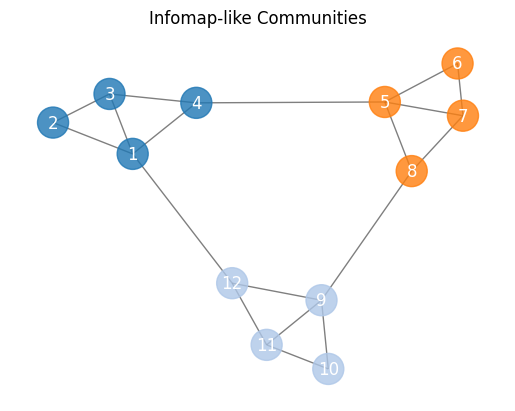


Running Genetic Algorithm (using weighted modularity)...
Generation 0: Best modularity = 0.0894
Generation 1: Best modularity = 0.1294
Generation 2: Best modularity = 0.1427
Generation 3: Best modularity = 0.1521
Generation 4: Best modularity = 0.2775
Generation 5: Best modularity = 0.2775
Generation 6: Best modularity = 0.2933
Generation 7: Best modularity = 0.3711
Generation 8: Best modularity = 0.3711
Generation 9: Best modularity = 0.4264
Generation 10: Best modularity = 0.4264
Generation 11: Best modularity = 0.4264
Generation 12: Best modularity = 0.4264
Generation 13: Best modularity = 0.5064
Generation 14: Best modularity = 0.5064
Generation 15: Best modularity = 0.6000
Generation 16: Best modularity = 0.6000
Generation 17: Best modularity = 0.6000
Generation 18: Best modularity = 0.6000
Generation 19: Best modularity = 0.6000
Generation 20: Best modularity = 0.6000
Generation 21: Best modularity = 0.6000
Generation 22: Best modularity = 0.6000
Generation 23: Best modularity =

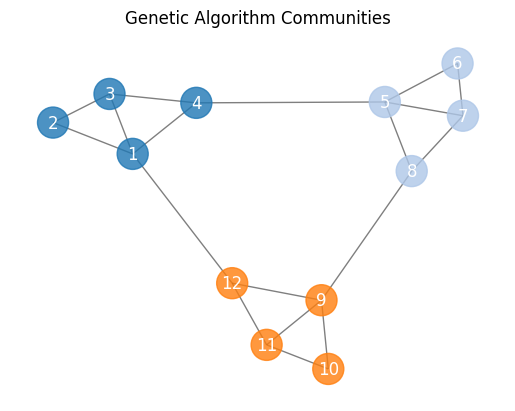

In [ ]:
# Run Infomap-like algorithm.
print("Running Infomap-like algorithm...")
im = Infomap(G_directed, teleportation=0.15, max_iter=100)
infomap_partition, L_value = im.run()
print("Infomap Partition (node -> module):", infomap_partition)
infomap_communities = partition_to_communities(infomap_partition)
print("Infomap Communities:", infomap_communities)
print("Infomap description length (L):", L_value)
visualize_communities(G_undirected, infomap_partition, title="Infomap-like Communities")

# Run Genetic Algorithm.
print("\nRunning Genetic Algorithm (using weighted modularity)...")
ga = GeneticAlgorithmCommunityDetection(
    G_undirected,
    population_size=50,
    generations=50,
    mutation_rate=0.1,
    tournament_size=3
)
ga_partition, ga_modularity = ga.run()
print("Genetic Algorithm Partition (node -> community):", ga_partition)
ga_communities = GeneticAlgorithmCommunityDetection.partition_to_communities(ga_partition)
print("Genetic Algorithm Communities:", ga_communities)
print("Genetic Algorithm modularity:", ga_modularity)
visualize_communities(G_undirected, ga_partition, title="Genetic Algorithm Communities")